In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def plot_images(object_image, background_image, result_image):
    plt.figure(figsize=(15, 15))
    
    # Plot object image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB))
    plt.title('Object Image')
    plt.axis('off')
    
    # Plot background image
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB))
    plt.title('Background Image')
    plt.axis('off')
    
    # Plot composite image
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Composite Result')
    plt.axis('off')
    
    plt.show()

In [13]:
def compute_alpha_mask(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to create a binary mask
    _, alpha = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

    return alpha

In [14]:
def alpha_matting_composite(foreground_path, background_path):
    # Read images
    foreground = cv2.imread(foreground_path, cv2.IMREAD_UNCHANGED)
    background = cv2.imread(background_path)

    # Resize background image to match foreground dimensions
    background = cv2.resize(background, (foreground.shape[1], foreground.shape[0]))

    # Compute alpha mask
    alpha = compute_alpha_mask(foreground)

    # Normalize alpha channel to range [0, 1]
    alpha = alpha.astype(float) / 255

    # Composite images
    composite = np.zeros_like(foreground, dtype=np.uint8)
    for c in range(3):
        composite[:, :, c] = foreground[:, :, c] * alpha + background[:, :, c] * (1 - alpha)

    # Save output
    plot_images(foreground,background,composite)

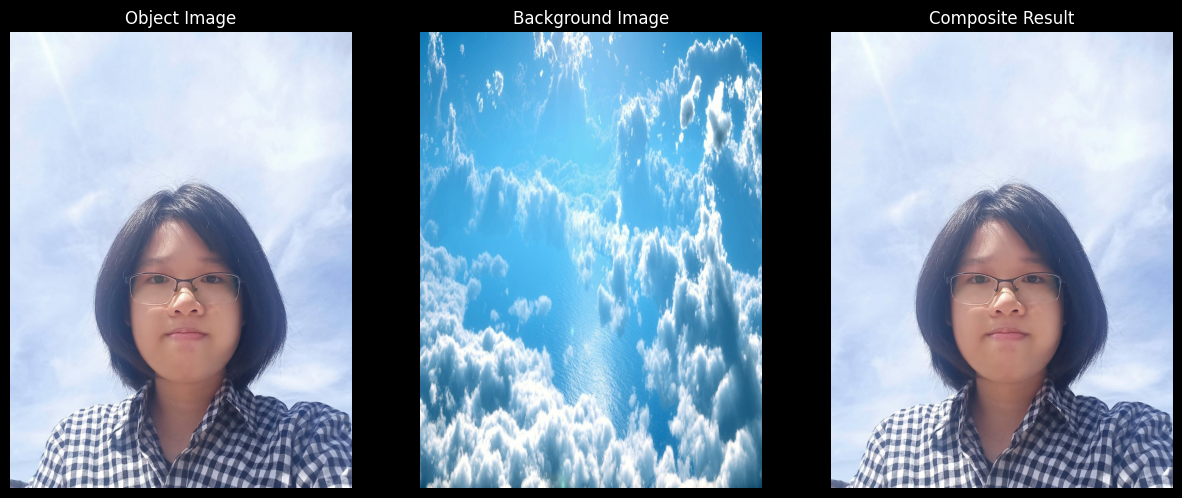

In [18]:
# Example usage
image = 'rika.jpg'
background_image = 'background.jpg'


alpha_matting_composite(image, background_image)